<a href="https://colab.research.google.com/github/riteshy7007/CNN-Projects/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10


100% 715M/715M [00:10<00:00, 93.3MB/s]
100% 715M/715M [00:10<00:00, 73.2MB/s]


In [4]:
!ls


cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = "cifar-10.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
!ls


cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

In [8]:
import py7zr
archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [10]:
filenames = os.listdir('train')

In [11]:
len(filenames)

50000

In [12]:
print(filenames[0:5])
print(filenames[-5:])

['24507.png', '7698.png', '37346.png', '30584.png', '49163.png']
['1566.png', '13846.png', '43340.png', '2894.png', '7941.png']


In [13]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [23]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [15]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [17]:
label_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels =[label_dictionary[i] for i in labels_df['label']]

In [19]:
print(labels[0:5] )
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


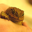

In [21]:
import cv2
from google.colab.patches import cv2_imshow
img =cv2.imread('/content/train/49997.png')
cv2_imshow(img )

In [22]:
labels_df[labels_df['id'] == 49997]

,id,label
49996,49997,frog


In [25]:
id_list = list(labels_df['id'])

In [26]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [32]:
!pip install Pillow
from PIL import Image
import numpy as np
train_data_folder ='/content/train/'

data=[]

for i in id_list:
   image =Image.open(train_data_folder+str(i)+'.png')
   image =np.array(image)
   data.append(image)

In [34]:
type(data)

list

#convert Images list and labels to numpy arrays

In [36]:
X= np.array(data)
Y= np.array(labels)
type(X)
type(Y)

numpy.ndarray

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000,)
(10000,)


In [38]:
X_train_scaled = X_train / 255


In [39]:
X_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [41]:
import tensorflow as tf
from tensorflow import keras

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input # Added Input layer

num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), # Changed Input(shape)==(32,32,3) to input_shape=(32,32,3)
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(X_train_scaled, y_train,validation_split=.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1523 - loss: 2.2515 - val_accuracy: 0.1922 - val_loss: 2.1117
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1884 - loss: 2.1059 - val_accuracy: 0.1805 - val_loss: 2.0973
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1944 - loss: 2.0738 - val_accuracy: 0.1968 - val_loss: 2.0557
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1941 - loss: 2.0582 - val_accuracy: 0.1920 - val_loss: 2.0571
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1894 - loss: 2.0569 - val_accuracy: 0.2017 - val_loss: 2.0406
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1920 - loss: 2.0447 - val_accuracy: 0.1965 - val_loss: 2.0366
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1914 - loss: 2.0423 - val_accuracy: 0.1975 - val_loss: 2.0388
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1930 - loss: 2.044

** Using ResNet**

In [54]:
from  tensorflow.keras import  Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from  tensorflow.keras.models import load_model
from  tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [56]:
Convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [57]:
num_of_classes = 10

model =  models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(Convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [59]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), # Use learning_rate instead of lr
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history =model.fit(X_train_scaled, y_train,validation_split=.1, epochs=10)

Epoch 1/10
 149/1125 ━━━━━━━━━━━━━━━━━━━━ 9:09:09 34s/step - accuracy: 0.1671 - loss: 2.6094

In [ ]:
loss,accuracy = model.evaluate(X_test, y_test)

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()